## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort('Number of Discharges')

/Users/jag/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


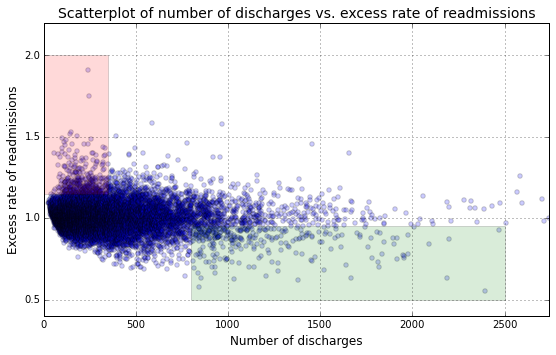

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

****

## Critique

I disagreee with the preliminary analysis and conclusions presented above. First, the initial observations on the plot note an overall downward trend in the rate of readmissions with increasing number of discharges. However, this trend is not clear in the figure, and there is a large amount of variation in the data. The statistics provided in the preliminary analysis did not include the margin of error, so its difficult to assess whether the differences are significant. The preliminary analysis concludes that there is a correlation between hospital capacity and readmission rates, but no evidence is provided to support this conclusion. 

****

****

## Hypothesis Tests

### Mean Excess Readmission Rates
First, construct a hypothesis test to examine the mean excess readmission rates of hospitals with low and high number of discharges. The null hypothesis, $H_0$, is that there is no difference in mean excess readmission rates. The alternate hypothesis, $H_A$ is that a difference in the means of the two samples do exist. A T-distribution and test statistic can be used to evaluate the hypothesis.

In [5]:
# separate the data set into two groups, based on number of discharges 
df = clean_hospital_read_df
small_hosp = df[df['Number of Discharges']<100]
large_hosp = df[df['Number of Discharges']>1000]

In [6]:
# use t-test to evaluate the hypothesis
from scipy import stats
T, p = stats.ttest_ind(small_hosp['Excess Readmission Ratio'].dropna(), 
                       large_hosp['Excess Readmission Ratio'].dropna(), 
                       equal_var=False)
print 'Test Statistic (T):', T
print 'p-value:', p

Test Statistic (T): 7.6017424185
p-value: 1.27524354511e-13


Since the **p-value is much smaller than the significance level ($\alpha$ = 0.01)**, there is convincing evidence to **reject the null hypothesis**. Therefore, the difference in the mean excess readmission ratios for hospitals with over 1000 discharges compared to those with less than 100 discharges was statistically significant.

### Proportion of Hospitals with Excess Readmission Rate > 1
Construct a hypothesis test to examine the proportion of hospitals with an excess readmission ratio greater than one. The null hypothesis, $H_0$, is that there is no difference in two proportions. The alternate hypothesis, $H_A$ is that a difference in the proportions of hospitals with excess readmission ratios greater than one for the two samples do exist. 

In [7]:
# pooled proportion is the total number of hospitals with excess readmission ratio > 1, 
# divided by the total number of hospitals
s = small_hosp['Excess Readmission Ratio'].dropna()
l = large_hosp['Excess Readmission Ratio'].dropna()

n = len(s) + len(l)
m = sum(s > 1) + sum(l > 1)

pooled = float(m) / n
pooled

0.579648697758934

In [8]:
# Std Error calculated using the pooled proportion
SE = ( (pooled*(1-pooled) / len(s)) + (pooled*(1-pooled) / len(l)) ) ** 0.5

p_diff = 0.64 - 0.44
p_null = 0

z = (p_diff - p_null) / SE
p = stats.norm.sf(abs(z))*2

print 'Test Statistic (z):', z
print 'p-value:', p

Test Statistic (z): 7.39548301567
p-value: 1.40895168604e-13


Since the **p-value is much smaller than the significance level ($\alpha$ = 0.01)**, there is convincing evidence to **reject the null hypothesis**. Therefore, the difference in the proportions of hospitals with an excess readmission ratio > 1 for hospitals with over 1000 discharges compared to those with less than 100 discharges was statistically significant.

****

****

## Correlation of Number of Discharges and Excess Readmission Ratio

In the preliminary analysis, a *significant correlation* was noted between hospital capacity (number of discharges) and readmission rates. To verify this conclusion, the correlation coefficient between these two quantities was calculated.


In [9]:
df[['Number of Discharges','Excess Readmission Ratio']].corr()

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000


The correlation between hospital capacity and readmission rates are weak, and slightly negative. This means that, in general, readmission rates do decrease with greater hospital capacity, but the effect is very weak. The weakness of the correlation indicates that factors other than simply hospital capacity likely play a role in the readmission rates.

****


****

## Conclusions

There were statistically significant ($\alpha$ < 0.01) differences between the mean excess readmission ratios (*1.023 vs 0.978*) and the proportion of those ratios greater than one (*63% vs 44%*) when comparing hospitals with small (<100 discharges) and large (>1000 discharges) capacities. However, the practical signficance of these findings is limited. Analysis of the correlation between these two quantities showed only a weak relationship, and there significant variation in the data. There are numerous possibilities for confounding factors that could affect readmission rates, which have nothing to do the quality of care provided by these facilities. For example, small hospitals may be more likely to be located in rural areas. The extended travel times of patients to reach rural hospitals results in delayed treatment of the condition, which may increase the likelihood of complications and the need for readmission.  

In summary, although differences in readmission rates were found based on hospital capacity, caution should be exercised in making policy recommendations. Additional work should be conducted to identify and quantify other factors affecting readmission rates. Rather than penalize small hospitals, the factors that allowed the large hospitals to achieve lower readmission rates should be identified, and if possible, implement these strategies at the small hospitals. In addition, there is no evidence that consolidating hospitals into fewer, larger capacity hospitals will have the intended effect of lowering readmission rates.  

****